In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## 随机1000 个数据
np.random.seed(1) #种子只是为了重现结果
data = np.random.randint(low = 1, high = 100, size = 1000)#产生1到100的1000个数据

# 计算基尼系数
基础数据来自【1】中随机生成的1000个数字

In [6]:
def gini(arr):
    # 首先排序
    arr = np.array(sorted(arr))
    n = len(arr)
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(arr)])
    return coef_*weighted_sum/(arr.sum()) - const_

gini(data)

0.3313838956962638

In [15]:
arr = np.array(sorted(data))
n = len(data)

# 绘制洛伦兹曲线
> 洛伦兹曲线（Lorenz curve），也译为“劳伦兹曲线”。就是，在一个总体（国家、地区）内，以“最贫穷的人口计算起一直到最富有人口”的人口百分比对应各个人口百分比的收入百分比的点组成的曲线。为了研究国民收入在国民之间的分配问题，美国统计学家（或说奥地利统计学家）M.O.洛伦兹（Max Otto Lorenz，1876- 1959）1907年（或说1905年）提出了著名的洛伦兹曲线。

基础数据来自【1】中随机生成的1000个数字

## 01:cumsum()函数
cumulative是累计、累积的意思，也就是说这个函数可以返回一个累计值，我们经常会遇到月累计、年累计这种指标，用这个函数就很方便了。在这里就是按照排序不断累加，模拟洛伦兹曲线中要求的横轴：人口（按收入由低到高分组）的累积百分比

## 02:绘图横轴np.arange(X_lorenz.size)/(X_lorenz.size-1)
建立取值范围为0到1，步长为0.01的1000个值

## 03:图像解读
本质上是众多散点图的叠加而不是一根直线


In [7]:
def lorenz_curve(X):
    X = np.array(sorted(X))
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    fig, ax = plt.subplots(figsize=[6,6])
    ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz,
               marker='x', color='red', s=1)
    ax.set_title("Lorenz curve",fontsize=15)
    ax.set_ylabel('Cumulative share of income eamed')
    ax.set_xlabel('Cumulative share of people form lowest to highest incomes')
    ax.plot([0,1], [0,1], color='k')
    plt.show
    #plt.savefig('luolunzi.png')

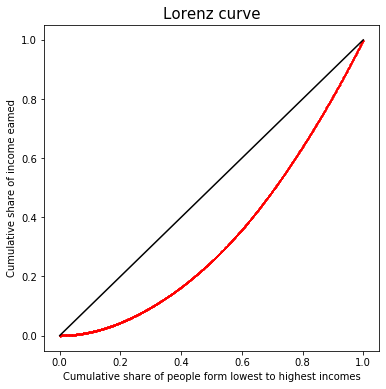

In [8]:
lorenz_curve(data)